In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt



In [13]:

print("Load gesture_data.csv...")

if not os.path.exists('gesture_data.csv'):
    print("ERROR: gesture_data.csv tidak ditemukan!")
    exit()

df = pd.read_csv('gesture_data.csv')
print(f"Jumlah Data per Kelas:\n{df['label'].value_counts().sort_index()}")


Load gesture_data.csv...
Jumlah Data per Kelas:
label
0    1372
1     444
2     654
3     830
4     525
Name: count, dtype: int64


In [14]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(42,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax') 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               5504      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 14085 (55.02 KB)
Trainable params: 14085 (55.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [17]:
print("Mulai Training...")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Mulai Training...
Epoch 1/50
96/96 [==============================] - 0s 903us/step - loss: 1.2329 - accuracy: 0.4654 - val_loss: 0.8402 - val_accuracy: 0.6980
Epoch 2/50
96/96 [==============================] - 0s 519us/step - loss: 0.5580 - accuracy: 0.8627 - val_loss: 0.3469 - val_accuracy: 0.9307
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.9343 - val_loss: 0.2043 - val_accuracy: 0.9608
Epoch 4/50
96/96 [==============================] - 0s 773us/step - loss: 0.1911 - accuracy: 0.9497 - val_loss: 0.1475 - val_accuracy: 0.9673
Epoch 5/50
96/96 [==============================] - 0s 607us/step - loss: 0.1451 - accuracy: 0.9601 - val_loss: 0.1129 - val_accuracy: 0.9699
Epoch 6/50
96/96 [==============================] - 0s 498us/step - loss: 0.1193 - accuracy: 0.9654 - val_loss: 0.0932 - val_accuracy: 0.9739
Epoch 7/50
96/96 [==============================] - 0s 487us/step - loss: 0.0927 - accuracy: 0.9739 - val_loss: 0.0901 - val_accurac

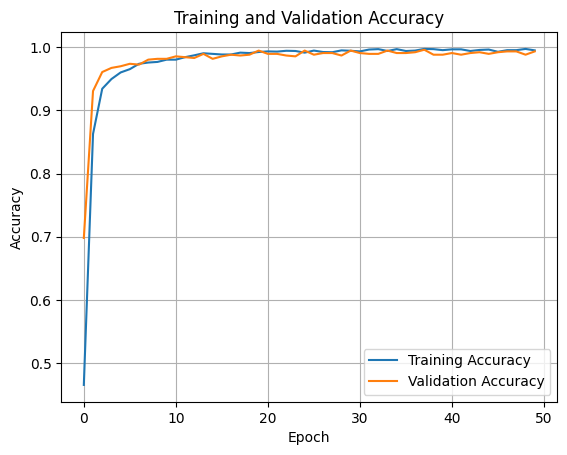

In [18]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
model.save('gesture_model.h5')
print("Model 'gesture_model.h5' siap digunakan.")

Model 'gesture_model.h5' siap digunakan.


/opt/anaconda3/envs/cv_train/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
